In [3]:
import scipy.stats as stats
from scipy import linalg as la
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Problem 6.2

In [23]:
def least_sq(X, y):
    """
    X - n fold samples
    y - draws
    
    return
        beta_hat - estimates for LSE
    """
    return np.linalg.solve(X.T@X, X.T@y)

### Part (i)

In [67]:
def part_i(solver):
    # define data
    n = 100
    X = np.hstack((np.ones((n,1)),np.random.random((n,1))))
    beta = [2.0,.5]
    e = .1*np.random.random(n)
    y = X@beta + e
    
    # plot
    plot_lst_sq(X[:,1], y, solver(X,y), beta)

### Part (ii)

In [26]:
def plot_lst_sq(data, y, beta_hat, beta=0):
    # print betas
    print("Beta:", beta, "Beta_hat:",beta_hat, "Error", abs(beta - beta_hat))


    # define function
    f_hat = lambda x: sum([beta_hat[i]*x**i for i in range(len(beta_hat))])
    
    # plot data
    plt.plot(data, y, "o", label="Data")
    
    # plot f if there are true values
    if beta != 0:
        f = lambda x: sum([beta[i]*x**i for i in range(len(beta))])
        plt.plot(data, f(data), label="True")
        
    # plot the least sq fit line
    plt.plot(data, f_hat(data), label="Least Sq Fit")
    plt.title("Least Squares Fit")
    plt.legend()
    plt.show()

Beta: [2.0, 0.5] Beta_hat: [2.04940017 0.50374165] Error [0.04940017 0.00374165]


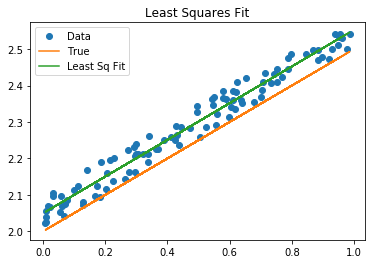

CPU times: user 455 ms, sys: 19.6 ms, total: 475 ms
Wall time: 448 ms


In [79]:
%%time 
part_i(least_sq)

### Part (iii)

In [66]:
def part_iii(solver):
    # define data
    n = 10
    x = np.array([[-1.7070417], [.48566752], [1.62940736], [-1.03619688], [.5160501], [.07292432], [.19432916], [1.98853255],[-1.20937744],[.24718355]])
    y = [12.97711586, -.07882501, 8.01895309, 6.0190389, 1.28260097, -.15612727,-.5740016, 9.29385226, 7.86261889, .05378747]
    X = np.hstack((np.ones((n,1)),x))

    # plot the data
    plot_lst_sq(X[:,1], y, solver(X,y))

Beta: 0 Beta_hat: [ 4.57476731 -0.8875824 ] Error [4.57476731 0.8875824 ]


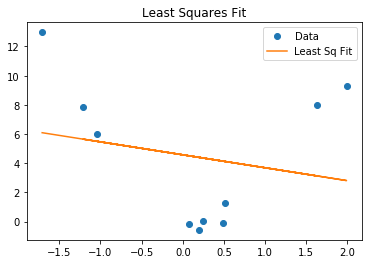

CPU times: user 290 ms, sys: 16.1 ms, total: 306 ms
Wall time: 321 ms


In [77]:
%%time 
part_iii(least_sq)

### Part (iv)

In [65]:
def part_iv(solver):
    n = 10**4
    d = 3
    beta = [1,-2,3,-4]
    X = np.hstack((np.ones((n,1)),np.random.random((n,3))))
    e = .05*np.random.randn(n)
    y = X@beta + e

    # calculate and compare
    print(solver(X,y), beta)

In [80]:
%%time
part_iv(least_sq)

[ 0.99895891 -2.00136466  2.9994632  -3.99768516] [1, -2, 3, -4]
CPU times: user 3.83 ms, sys: 2.72 ms, total: 6.55 ms
Wall time: 10.9 ms


## Problem 6.4

In [122]:
def qr_least_sq(X, y):
    d = X.shape[1]
    Q, R = np.linalg.qr(X)
    R = R[:d,:d]
    C = (Q.T@y)[:d]
    return la.solve_triangular(R, C)

Beta: [2.0, 0.5] Beta_hat: [2.05284563 0.4950217 ] Error [0.05284563 0.0049783 ]


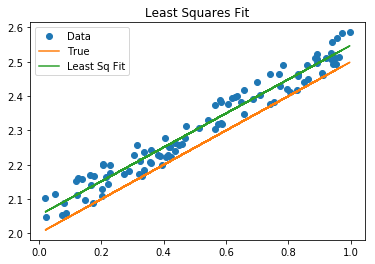

CPU times: user 438 ms, sys: 18.6 ms, total: 456 ms
Wall time: 320 ms


In [123]:
%%time 
part_i(qr_least_sq)

Beta: 0 Beta_hat: [ 4.57476731 -0.8875824 ] Error [4.57476731 0.8875824 ]


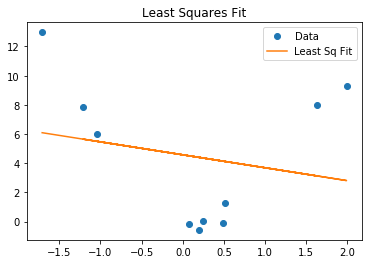

CPU times: user 281 ms, sys: 14.6 ms, total: 295 ms
Wall time: 302 ms


In [124]:
%%time 
part_iii(qr_least_sq)

In [125]:
%%time 
part_iv(qr_least_sq)

[ 0.99992541 -1.99980077  3.00078583 -4.0004075 ] [1, -2, 3, -4]
CPU times: user 6.81 ms, sys: 2.92 ms, total: 9.73 ms
Wall time: 30.9 ms


## Problem 6.5

In [41]:
def dino_dataset():
    dino = pd.read_csv("DatasaurusDozen.tsv", sep='\t',header=0)

    for ds in set(dino.dataset):
        data = dino[dino.dataset==ds]
        data_y = data.y.values
        data_x = data.x.values
        print("Mean:", data.mean())
        print("Mean:", data.var())

        y = data_y
        x = [[i] for i in data_x]
        X = np.hstack((np.ones((len(data_x),1)),x))
        beta_hat = qr_least_sq(X,y)

        f = lambda d: d*beta_hat[1] + beta_hat[0]
        
        data.plot(x='x',y='y', kind="scatter")
        plt.plot(data_x, f(data_x))
        plt.title(ds+" Dataset")
        plt.show()
    

Mean: x    54.268805
y    47.835450
dtype: float64
Mean: x    281.122364
y    725.763490
dtype: float64


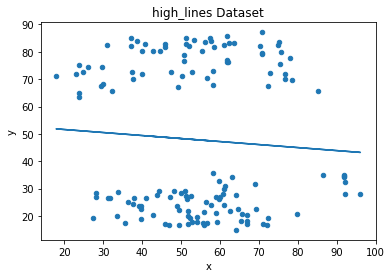

Mean: x    54.268730
y    47.830823
dtype: float64
Mean: x    281.207393
y    725.533372
dtype: float64


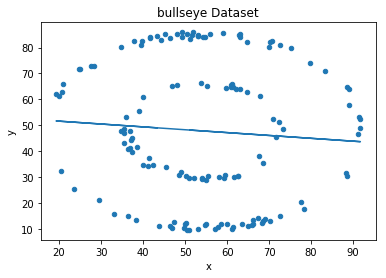

Mean: x    54.266100
y    47.834721
dtype: float64
Mean: x    281.227029
y    725.749775
dtype: float64


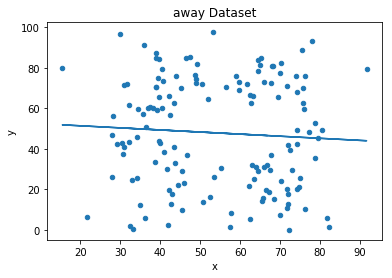

Mean: x    54.260303
y    47.839829
dtype: float64
Mean: x    281.156953
y    725.235215
dtype: float64


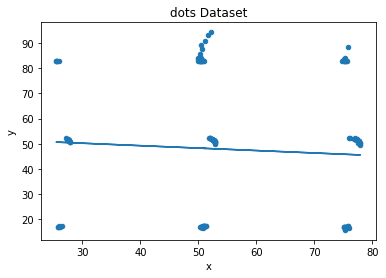

Mean: x    54.265882
y    47.831496
dtype: float64
Mean: x    281.194420
y    725.688605
dtype: float64


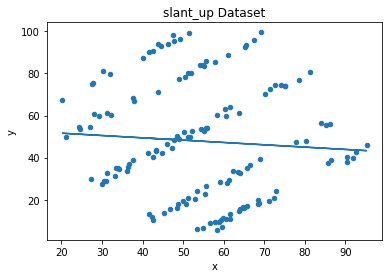

Mean: x    54.267341
y    47.839545
dtype: float64
Mean: x    281.197993
y    725.239695
dtype: float64


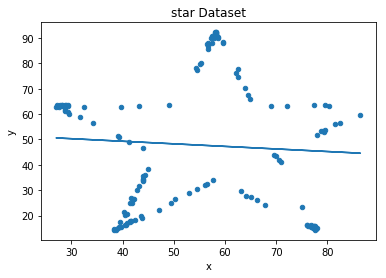

Mean: x    54.261442
y    47.830252
dtype: float64
Mean: x    281.095333
y    725.756931
dtype: float64


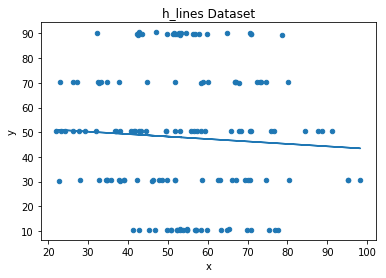

Mean: x    54.260150
y    47.839717
dtype: float64
Mean: x    281.231481
y    725.224991
dtype: float64


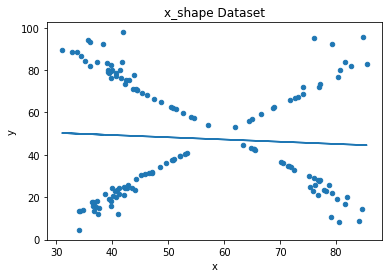

Mean: x    54.263273
y    47.832253
dtype: float64
Mean: x    281.069988
y    725.515961
dtype: float64


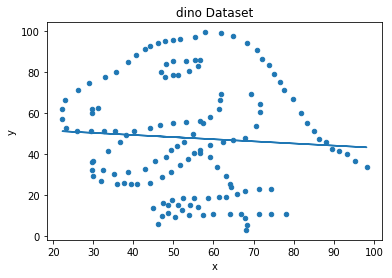

Mean: x    54.266916
y    47.831602
dtype: float64
Mean: x    281.232887
y    725.650560
dtype: float64


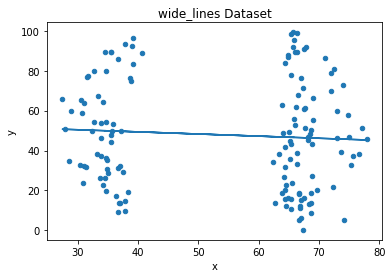

Mean: x    54.267849
y    47.835896
dtype: float64
Mean: x    281.124206
y    725.553749
dtype: float64


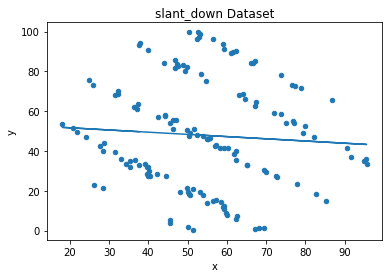

Mean: x    54.267320
y    47.837717
dtype: float64
Mean: x    280.898024
y    725.226844
dtype: float64


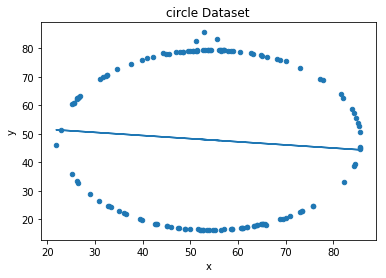

Mean: x    54.269927
y    47.836988
dtype: float64
Mean: x    281.231512
y    725.638809
dtype: float64


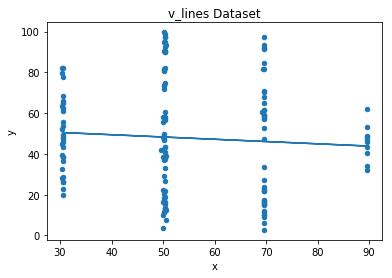

In [19]:
dino_dataset()

This means that wildly different datasets can have the same mean and variance 

## Problem 6.6

In [60]:
def svd_least_sq(X ,y):
    U, S, V = la.svd(X,full_matrices=False)
    S = np.diag(S)
    return V.T@la.inv(S)@U.T@y

### Part (i)

Beta: [2.0, 0.5] Beta_hat: [2.04392561 0.50444836] Error [0.04392561 0.00444836]


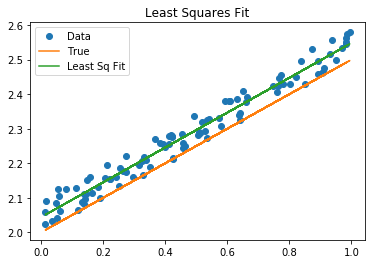

CPU times: user 378 ms, sys: 20.1 ms, total: 398 ms
Wall time: 421 ms


In [71]:
%%time 
part_i(svd_least_sq)

Beta: 0 Beta_hat: [ 4.57476731 -0.8875824 ] Error [4.57476731 0.8875824 ]


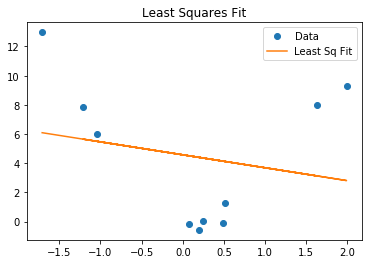

CPU times: user 287 ms, sys: 14 ms, total: 301 ms
Wall time: 339 ms


In [72]:
%%time
part_iii(svd_least_sq)

In [73]:
%%time
part_iv(svd_least_sq)

[ 1.00000003 -2.00073184  2.99980626 -3.99812977] [1, -2, 3, -4]
CPU times: user 5.19 ms, sys: 2.24 ms, total: 7.43 ms
Wall time: 20.7 ms


### Part (ii)

In [95]:
def part_6_ii():
    n = 10**3
    d = 6
    r = 3

    Z = np.random.random((n,3))
    X = np.hstack((Z,Z))

    beta = [1,-2,3,-4,5,-6]
    e = np.random.random(n)
    y = X@beta + e

    beta_hat = svd_least_sq(X,y)

    f = lambda x: sum([beta_hat[i]*x**i for i in range(len(beta_hat))])

    print("Differnece in betas:", la.norm(beta_hat - beta))
    print("Differenct in ys:", la.norm(y - X@beta_hat))

In [96]:
part_6_ii()

Differnece in betas: 624194834964675.2
Differenct in ys: 24.738104255459717
